In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [3]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_cells_positions, plot_cev_radius, plot_stacked_var_radius

In [15]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
METHOD = 'abs'
PCA_SCALED = False
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [16]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root="../../output") for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

[351.62748479 478.28553606 188.50068261 291.90582708 224.02393269
 686.42007544 636.94142076 198.62064286 455.18926099 243.86212387
 136.75917086 665.94301524 541.3100331  277.74888489 480.10207029
 737.71502451 323.90273043 488.58480876 492.59042733 381.73251006
 693.4314949  588.1267624  772.686532   225.43834599 708.43490942
 431.39567617 483.87819313 250.20811064 530.56985042  46.98070912
 366.7413439  528.02740135  58.99420006 329.77173246 263.2443556
  50.97606839 569.64217055 147.59395092 369.85982028 362.77260395
 446.15047099 398.33157361 295.03448924 503.63884078  64.00620648
 125.68054975 329.10448108 573.06129992  86.78557153 620.39145872
  48.16548936 237.636269   794.34868303  66.76692872 716.07848075
 448.89884152 532.18164967 208.24727428 532.07815472 365.13280937
 462.585576   766.14399041 694.0570909  523.82609514  45.28126426
 740.72690262  46.62803749 482.92631191 636.6828903  484.2989411
  44.69881078  54.89582487 749.9762598  335.13347085 247.11666136
 599.9301632

[631.40657381 267.3760195  469.36567766 714.09315262  39.91133865
 742.20671194 244.62996909 483.60180337 175.2213085  207.24442683
 357.17283063 531.7618217  681.37276473 449.86973246 743.98610749
 101.25861451 550.28116396 451.87023396 429.74130494 532.88665683
  93.82689875 603.80750975 119.93058228 133.90489996  45.21129178
 527.35660295 391.63788859 684.67505819 171.15582718 475.35534074
 520.83090752 105.45458559 187.70925925 562.67237965 650.72758407
 490.53063401 350.32280707 416.60657212 579.07882627 103.60454801
 332.9957103  180.93140201 552.26706111 292.13847577  57.20924954
 199.62038909 128.23043143 177.66886666 192.87675724 439.91260064
 207.38969259 681.243423   265.18890767 680.84251216 440.48074694
 684.98462364 589.9495837  697.274651   559.74529638 385.44885843
 628.93976758 674.96136333 434.60100892 235.97000281 146.82356046
 630.40041621 510.92914798 502.30472911 345.95742701 317.7606904
 466.64016073 365.91344683 602.46182404 280.19951459 129.81026249
 734.392197

[359.66320067 406.29432601 293.91361631 455.54611673 303.79199467
 511.22764014 331.10072948 516.9043273  479.26314638 309.70555007
 457.09136775 458.76684586 494.19761899 269.75244682 440.62896089
 368.41856427 335.96133993 264.84566564 296.24815587 355.88428215
 327.31704247 290.93670976 539.51760329 308.15173816 251.01040641
 435.29866164 515.19294465 526.48133346 381.24335949 378.50702272
 466.43415852 326.50633575 463.1092024  426.9438382  463.52434183
 391.88936277 407.77242709 484.70729217 467.73805427 437.55483636
 557.17829025 319.79952512 320.92307482 326.29443251 421.96651122
 382.01898111 320.78162494 502.86056986 491.71965534 285.45251068
 338.61468192 313.05355354 414.62856737 377.1958211  332.60258077
 521.1887092  385.70850932 339.78582956 464.62259299 404.37492103
 299.18311072 504.23921253 526.75315682 335.27919907 557.50385511
 444.96915248 544.92349392 558.32268365 254.90599871 398.90531244
 265.11131927 437.46755429 363.58647013 550.82367833 496.43894707
 243.66223

[314.50677005 775.01691623 467.41527694 102.3174399   55.07500364
 280.4388304  608.15433717 113.20970795 312.59622623  32.20068545
 633.05735071 252.86585525 167.74353432 404.98345577 724.865068
 669.40643714 126.0988844  600.34662363 256.95928244 301.07412618
 156.22862264 256.58864204 391.58545583 604.38371286 545.59831866
 410.75407561 520.28563707 347.84727201  16.69861092 201.9713587
 716.41144775  22.43738086 170.2371733  159.05323133 720.44080408
 647.19622834 698.36264287 736.19804925 266.22123443 591.96893678
  73.52166459 778.17951966 178.63368342 163.4307459  134.74247217
 784.22788824 289.69293037 354.92941928 736.29159678 365.8139253
 736.48526083 551.56679029 571.18897909 450.11409767 584.40737726
 472.46305658 381.33550646 155.4396057  177.51449633 223.51570794
 280.82507491 413.72601945 283.81176539 145.36814031 517.65028074
 424.12495227 746.32532011 164.20331452 695.43525005 166.50207877
 671.59612996  47.51605826 435.72411636 659.7301051  423.34954119
 648.99130581 

[642.43703646 450.29186515 445.71611243 431.78118244 190.22806998
 423.91034303 154.69128297 533.3611804   96.0565569  627.49772927
 236.17731162 547.23516243 573.05723327 561.77499003 230.40401912
 608.3028852  376.77973896 455.61951391 403.09447483 249.54506144
 276.0133639  581.23239356 226.86441303 180.67253456 137.80215868
 460.07771811 680.64537258 475.65068009 607.20310367 235.61343072
 286.53394124 165.75207176 566.84805439 150.64376026 452.23309044
 533.09871856 509.89721185 525.44131004 202.57223317 131.90717812
 595.62457513 603.21285739 412.28529458 534.55503666 400.7464218
 580.80345312 528.49213323 336.4798706  513.99632591 673.29680414
 260.66909581 305.94044137 371.67410538 447.01074064 661.36672429
 586.29433412 162.23273395 448.18859044 373.81545303 609.73908899
 320.78196513 188.86420863 227.53214786 321.34267866 349.33946024
 148.71099207 219.8502316  124.47443916 196.25475947 338.68249355
 391.22141948 508.49811491 131.85052362 341.47016284 634.38272089
 539.831123

[517.10423107 346.69117792 686.49246582  16.16410083 760.79892974
 776.30022931  56.39292781 257.945065   662.56306051 544.00879185
 298.04565134 718.14504136 788.19241636 295.44593299 743.04580509
 793.30705408 296.24224174 747.56768386 245.80968975 677.56242106
 117.74735529 538.23167044 190.85935037 256.53451918 249.83271102
 221.00866165 631.72758454  30.1396693  234.32514259   9.04427247
 247.95065722 100.23916788 566.04497636 155.33491446 612.61000322
 270.03846346 429.84654229 747.14371934 786.35904974 543.10106459
 569.45103848 458.8197045  497.85788397 220.07430125 652.94165729
  16.57838351 463.06445039  37.79308038 681.02397777 366.32091232
  63.71512203 412.6685006  753.80527222 278.99885928 718.76195017
 204.67551763  11.36313225  22.28759635 550.61403156 498.55788965
 138.62985522 103.45343824 392.7960283  623.47333589 234.16101723
 615.37298298 544.4642373  369.71377568 450.78716737 715.94133449
 231.54306567  35.49234397 770.647697   227.67870275 740.86694387
 468.65597

[ 59.04447926 444.13819968 608.74001763 628.99646204 185.88152135
 670.95789634  65.31564499 169.25754729 753.17170147 395.69743541
 757.46573466  49.60518614 682.58231946 156.47514248 250.33823647
  68.1582282  660.69363362 296.41544167 203.64195884  84.45108542
  66.67728008 204.79201361 278.67059646 179.05832847  76.0123003
 300.2800932  553.04064366 656.28398485 205.42436038 683.0855617
 576.5778399  329.0991069  521.47777007 112.64198769 470.714065
 403.1864243  424.8019203  689.14315865 141.30517212 623.82989844
 395.16265897 563.01680862 735.45955454 695.53949814 336.9765222
  59.27150978 670.19189317 597.16012014  63.84963623 628.95825412
 425.79102237 632.51215779 299.30338917 513.27808387  81.35303793
 440.08704136 327.82161003 729.40901838 569.67969744 634.53135472
 375.28374279 571.49237663 583.0649634  659.9414545  337.97384899
 176.01238846  90.28473007 150.25512702 357.05778436 328.16716046
 505.26101344 223.76567206 705.75408983 718.34481525 478.0357611
 577.01587107 31

[479.29072735 300.79011518 485.30781839 314.9549334  359.1975558
 550.44631236 396.62316904 505.60860688 316.70305827 358.83431439
 288.73006138 402.50895134 559.56244223 304.49644373 504.73745683
 313.31394161 512.10743454 470.01468063 316.72162495 359.11857241
 449.91731077 474.63447577 427.23713922 342.5365485  431.06185583
 477.44033537 344.31843324 461.31815292 457.71628868 422.48340657
 539.66691101 483.09250487 555.53065058 510.51335403 322.19967408
 540.087022   410.33270754 372.5365512  284.24105714 421.32460223
 402.07155243 299.93184095 340.81977029 307.07806228 436.13671608
 355.89552188 421.20902398 293.13880013 259.8848693  278.14381414
 241.3869249  360.83921303 364.33064584 488.27559962 473.40784237
 440.24330122 378.31226704 383.95631175 251.26483317 478.51224676
 490.28695767 501.98642677 255.78104595 518.6336742  498.67243665
 464.19058762 335.1267327  262.4799393  487.7791658  492.62516957
 381.14458576 475.3083773  520.72556698 392.4658291  378.56345368
 556.561925

[738.72145021 781.42569516 397.66968175 201.17582083 745.10146146
 250.98564779 746.98701934 334.28628641 321.0093795  662.34731569
 246.79467543  53.63018556  61.38263358 561.56636751 771.66919376
 626.51032881  88.09444387 215.67941637 580.34555815 314.02649395
 693.09204559 406.88149255 767.24277177 408.65447018 248.33425066
 188.3745264  473.83303536 526.37405368 186.35795233 220.07972547
 361.34081578 601.59001414 481.51029701  16.49407707 704.17009102
 708.19373226 453.69462388 666.67735734 209.50835215  60.03702834
 470.68697456 716.12506366 576.19036815 431.67967248 464.26255189
 495.9478725  633.64092023 665.75210929 110.20470932 238.47798414
 365.55500668  43.48118198 202.38487011 598.98614946  65.06688232
 536.01864018  25.93169177 481.97262596 335.70924558 731.72103833
 125.06816683 715.17948209 132.85634243 365.09366365 268.05657887
 180.87641317 542.37445478 394.0903835  454.91433754 421.73792163
 167.21373206 170.81940583 337.76635495  63.51184522  67.35552146
 753.35082

[456.92176123 456.32777262 607.88832704 331.15801555 227.94250178
 318.99093267 250.11171636 434.02395818 528.36119305 290.78608978
 706.12516782 268.45511131 378.88586996 614.70194996 171.36472231
 338.82335459 204.28138282 623.15780868 313.79142338 133.88135416
 270.00765022 375.78585637 313.25833263 484.9164195  271.56735753
 315.28032168 508.50228428 113.83374515 658.2759561  507.41202291
 248.77374961 681.53718827 667.67854005 500.23047684 527.34198933
 263.00169047 218.15914896 453.15932212 386.34463413 494.55881262
 643.75899305 605.90503912 426.98122022 643.27824974 543.79382482
 332.17855996 568.39835603 319.85570427 332.3447747  355.76395805
 609.78349654 183.76670524 601.19236529 242.61764638 340.74624937
 500.2846667  240.01387775 230.63385267 550.6050067  533.71846711
 375.11669986 483.79656918 151.61582241 277.9501201  419.13332776
  94.74417496 106.11335414 211.62139372 378.97166181 166.09764724
 106.5455272  381.32322933 561.18924899 331.52416031 619.15254147
 527.06145

[727.76423314 769.05361536 633.49034286 760.64555286  58.41693049
  20.08813447 350.18163015 125.70695293 631.37375895 277.86387702
 534.39981987 698.56802948 634.63497807  64.49218199 146.67612973
 404.89599651 436.39845367 599.2362806  106.4358762  347.91754876
  67.78748179 379.7986867  658.31519396 350.99030527 200.72510571
 214.47440598 736.30650547 249.64038086 536.28301063 203.75982291
 120.2861957  572.98526255 364.73155712 491.8553421  718.54517624
 743.30893392 411.68914175 330.76719484 202.46155753 418.62970754
 172.74004981 311.19185519 436.63154583 478.4590648  200.78753171
 672.02123204 321.07164403 191.62613571 578.74226182 564.82538676
 150.43886877 482.36602033 290.17902484  79.60833218 681.77133782
 200.31748888 264.27825153 585.52714606  11.21957445 487.1713492
 134.35698763 164.35632908 271.20833761 677.01975292 615.39140483
 515.88582774 617.04061346 407.92378762 185.00700372 486.69269047
 293.03896649 476.17761751  20.87064958 136.14329536 229.04668233
 307.207347

[187.74193661 295.05618225 415.05121424 589.95087293 747.84322814
 651.33931225 539.07908559 624.31117525 419.20813117 394.23940684
 193.93113847 548.44316978 628.30591382 672.18950338 741.39711824
 550.03224343 539.97359331 710.99549525 751.5065544  500.50048708
 609.10257946 735.27028022 721.36697169 540.73646206 459.09409397
 294.51047405  93.39582765 702.97830792  36.81524686 526.6779445
 345.26138649 226.23570619 702.28781613 496.50194647 703.18021387
 676.54891631 286.21185252 112.26028518 410.25805436 460.39899339
 737.05321338 116.5790028  712.46839277 679.95577607 527.83212567
  65.77957764 756.73462539 650.90715928 102.67971514 391.48071518
 169.20441193 429.41284221  38.83184645 166.64966578 271.01054887
 652.9033659   38.8319522  111.61843566 638.8155495  348.71561545
 438.01264628 179.15891741 363.50422883 696.89707444 310.95847831
 481.69958411 153.89258032 636.06870846 214.79643788 598.26968524
  78.95604233 557.4172633  397.20891733 570.52573112 328.59748048
 727.090907

[530.31206812 245.56869976 265.23216029 421.93706016 343.07558214
 549.1478639  263.43268045 535.64230992 434.69644247 424.96662706
 299.85830894 525.20397502 266.85501302 258.16354959 302.98535409
 322.55240499 295.5679316  339.66940876 381.70519437 414.64437574
 447.14837747 452.72828166 510.16875818 447.87939245 515.06145159
 407.39235869 420.48691827 438.75991614 371.69011342 479.78901438
 387.88330176 342.6982282  333.89168971 345.3896774  240.73979401
 469.40654121 250.86696472 295.76420896 398.75590085 542.0644386
 389.51369332 410.00864519 411.91660826 276.3015373  396.67039865
 469.39279216 259.33856971 473.69707286 461.88383883 494.64491962
 357.12050139 549.96080636 554.48721488 242.30737122 559.50891954
 253.44806395 389.96506742 275.02514706 424.5575995  263.77007203
 356.59858115 536.69091487 349.17043923 434.05023308 422.85336736
 295.71760316 306.39994415 426.70567194 278.36985541 316.40229521
 264.44155038 268.20447473 394.3878451  369.71580807 282.24927368
 426.169525

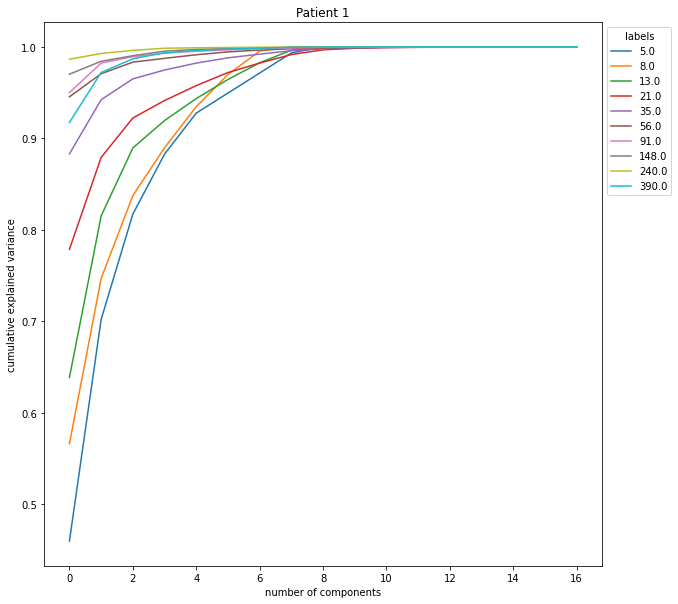

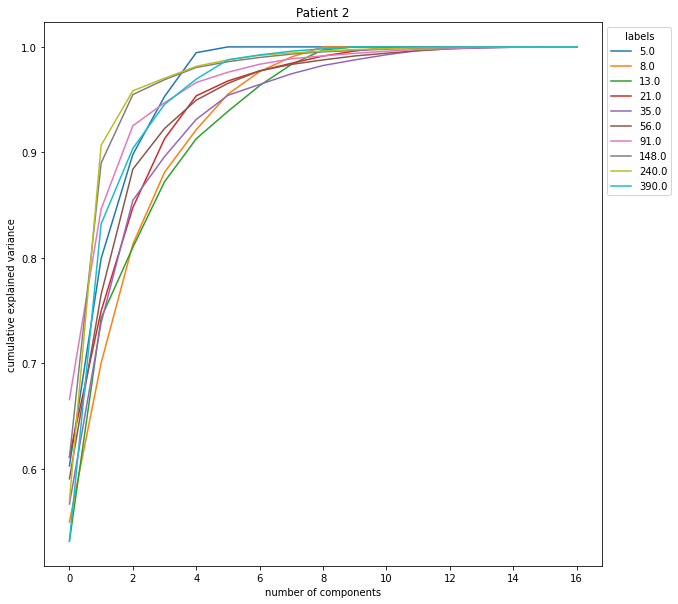

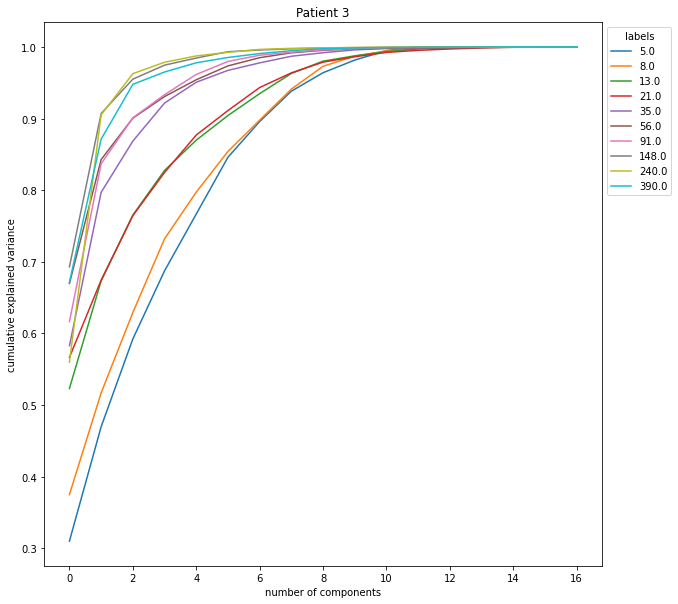

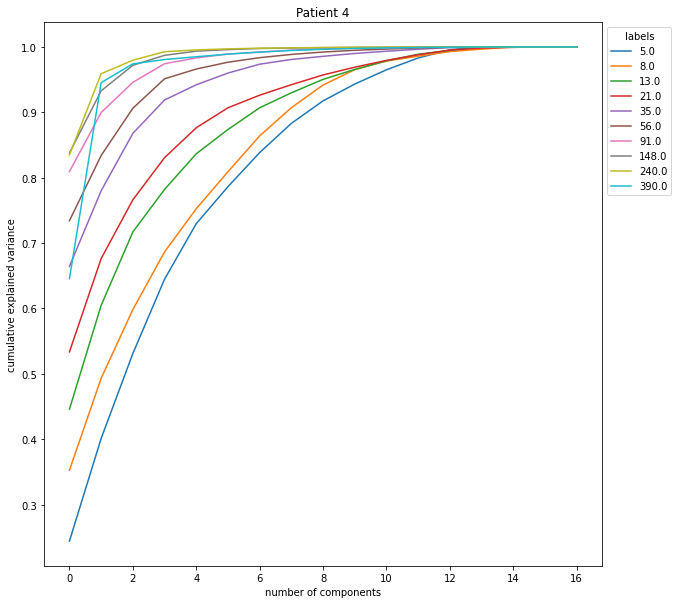

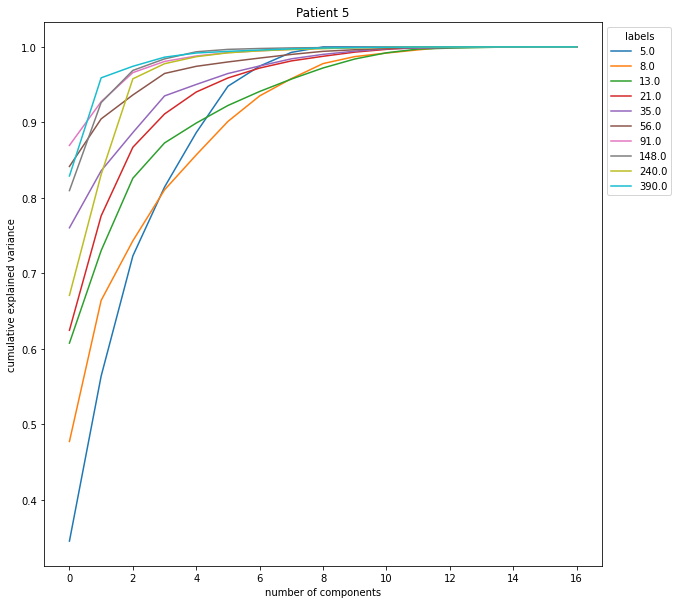

In [17]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [18]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [19]:
expl_var_ratio

{1: {5.0: array([4.59629578e-01, 2.42392341e-01, 1.15163751e-01, 6.56119027e-02,
         4.48162131e-02, 2.19230769e-02, 2.19230769e-02, 2.19230769e-02,
         6.61698462e-03, 1.85693053e-34, 1.17261499e-34, 5.51754858e-35,
         5.91130009e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  8.0: array([5.66192886e-01, 1.80589012e-01, 9.06408495e-02, 5.23268775e-02,
         4.49144103e-02, 3.51449143e-02, 2.56185178e-02, 4.57253317e-03,
         1.63360426e-34, 5.72601497e-35, 3.56012719e-35, 2.71560388e-36,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([6.38558963e-01, 1.76598890e-01, 7.43432722e-02, 3.00111979e-02,
         2.40168488e-02, 2.08930050e-02, 1.82246797e-02, 1.37928352e-02,
         2.14123669e-03, 1.41907159e-03, 2.97899850e-34, 1.22318958e-34,
         1.70083207e-35, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  21.0: array([7.7873053

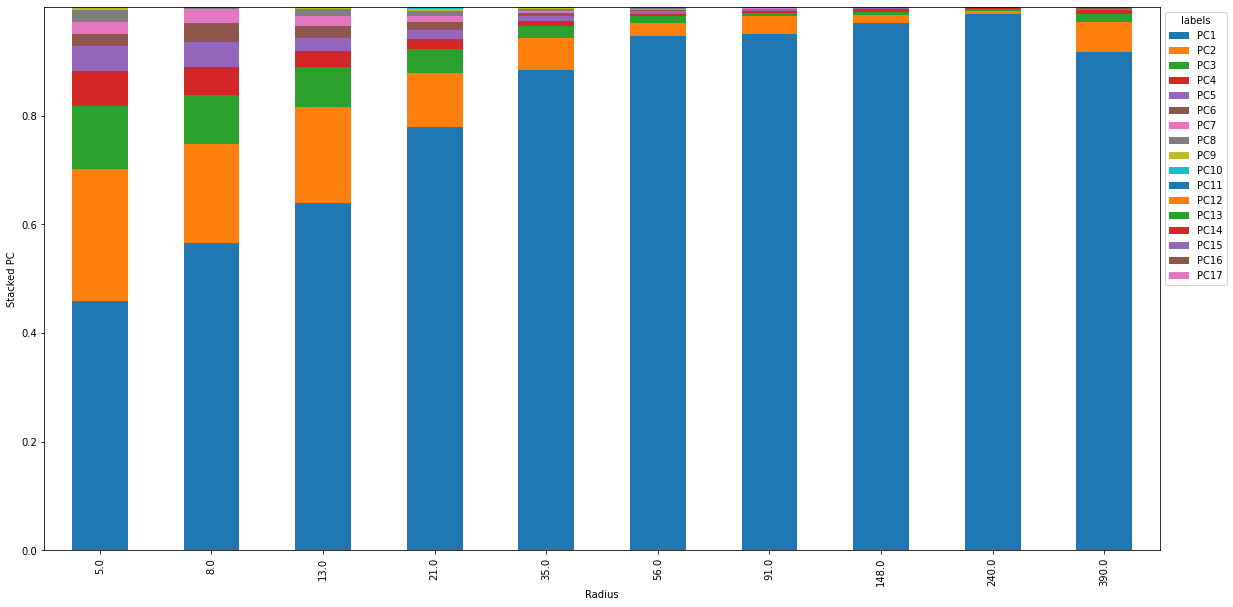

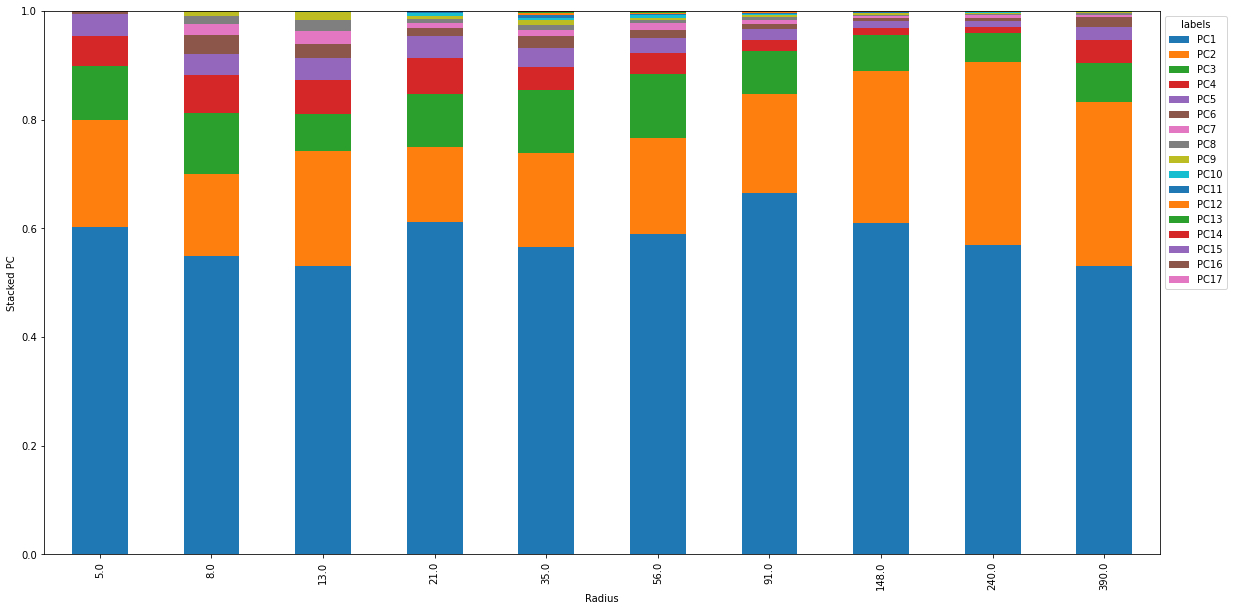

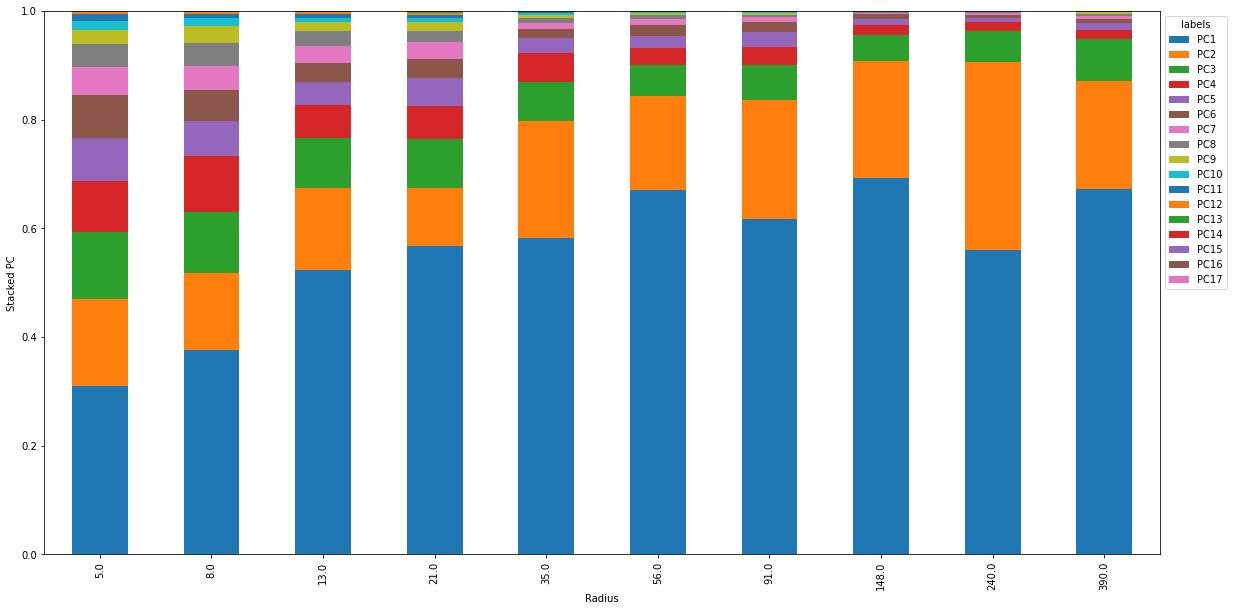

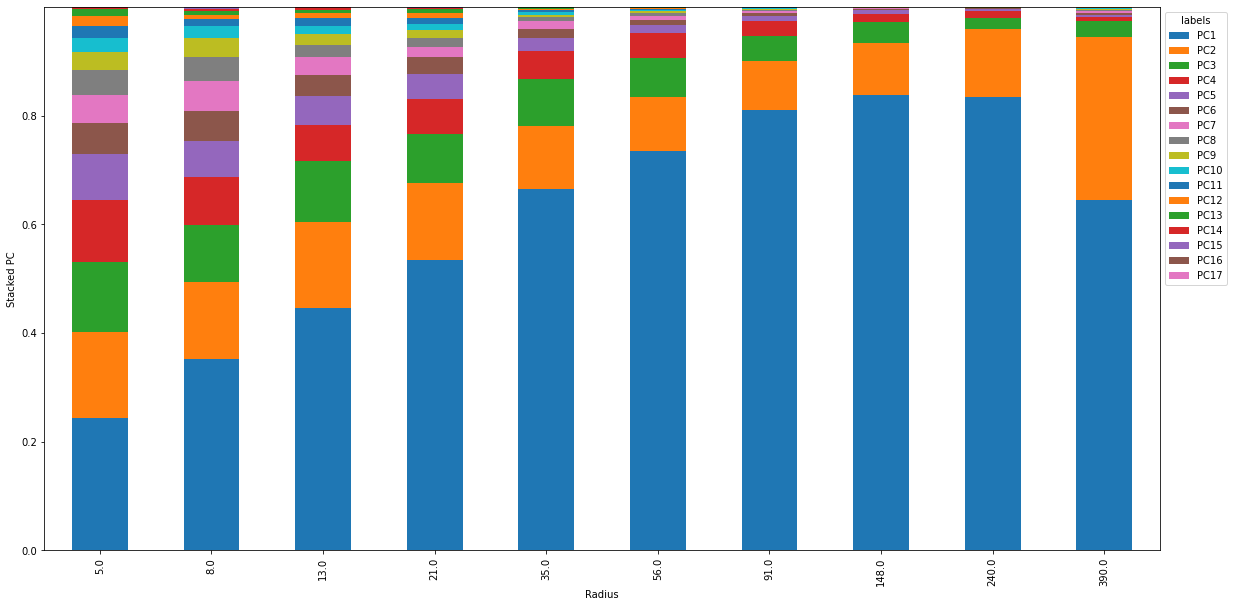

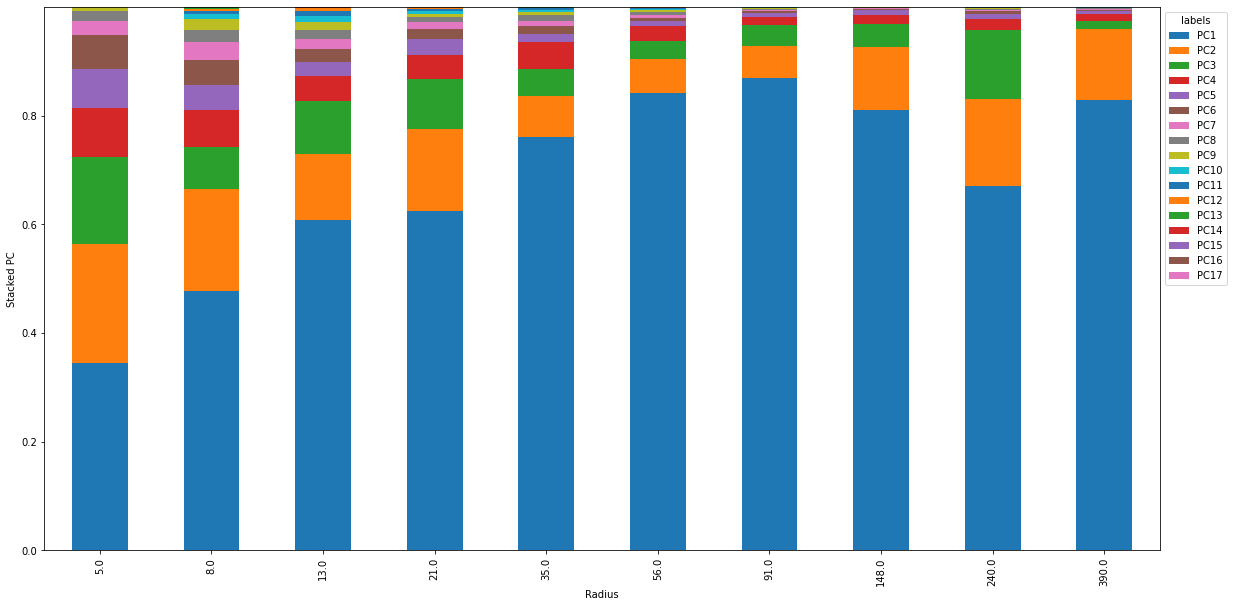

In [20]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

In [10]:
##################
# VERY VERY SLOW #
##################
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
res = {r: None for r in radius}
for r in radius:
    print("Processing Radius: {}".format(r))
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method='abs', snr=1)
    sites, full_patient_ids = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    res[r] = pca.explained_variance_ratio_

Processing Radius: 10.0
Processing Radius: 16.0
Processing Radius: 26.0


KeyboardInterrupt: 

In [ ]:
res

In [ ]:
plot_cev_radius(expr_var, 'All')